# Ultimate Technologies Inc

In [1]:
# libraries

import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Read Data Files

### Login Data

In [2]:
# read login data file

# load the json file as a list and convert to a df
with open('logins.json') as f:
   logins = pd.DataFrame(json.load(f)) 

# convert login_time to datetime column type
logins['login_time'] = pd.to_datetime(logins['login_time']) 

logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


### Challenge Data

In [4]:
# read challenge data file

with open('ultimate_data_challenge.json') as f:
   udc = pd.DataFrame(json.load(f)) # load the json file as a list and convert to a df
udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Data Description
- city: city this user signed up in
- phone: primary device for this user


- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’


- avg_dist: the average distance in miles per trip taken in the first 30 days after signup


- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips


- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips


- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [6]:
# list of cities in df

udc.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [7]:
# list of phones in df

udc.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

# PART 1 ‑ Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## Login Data

### Resample (15 min intervals)

In [8]:
# resample the login data by 15 minute intervals

# set the time interval
per = '15min' 

# resample the login data per time period
logins_agg = logins.resample(per, on='login_time').count() 

# rename index and column headers
logins_agg.index.names = ['Time Period']
logins_agg = logins_agg.rename(index=str, columns={"login_time": "Count"})

logins_agg.head()

,Count
Time Period,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Aggregate (day of the week)

In [9]:
# aggregate by day of the week (Sunday - Saturday)

logins_agg_day = logins.resample('W-MON', on='login_time').count() 
logins_agg_day.head()

,login_time
login_time,
1970-01-05,2833
1970-01-12,5294
1970-01-19,4956
1970-01-26,4744
1970-02-02,4881


### Aggregate (hour of the day)

In [10]:
# aggregate by hour of the day (0 - 23)



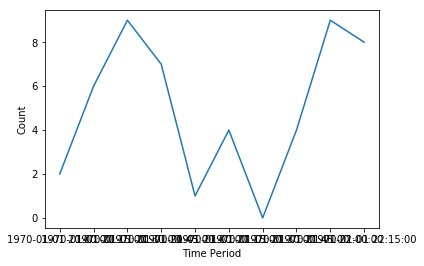

In [11]:
temp = logins_agg.head(10)

sns.lineplot(x=temp.index, y='Count', data=temp)


## Challenge Data

### Review Null Values

In [12]:
# check for null values

# count how many null values per row
udc_null = udc.isnull().sum(axis=1).to_frame()
udc_null.columns = ['null_count'] # set column header name

# count how many rows have 0,1,2... null values
null_count = {}
null_perc = {}
for n in range(len(udc.columns)):
    n_rows = udc_null[udc_null['null_count'] == n].size
    if n_rows > 0:
        null_count[n] = n_rows
        null_perc[n] = 100 * n_rows / udc.shape[0]
    
print('# of nulls vs. # of rows')
print(null_count)
print('# of nulls vs. % of rows')
print(null_perc)

# of nulls vs. # of rows
{0: 41445, 1: 8393, 2: 160, 3: 2}
# of nulls vs. % of rows
{0: 82.89, 1: 16.786, 2: 0.32, 3: 0.004}


In [13]:
# add a column for how many null values per row

udc['null_count'] = udc_null['null_count']
udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,null_count
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Plot Ratings

C:\Users\Miles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Miles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


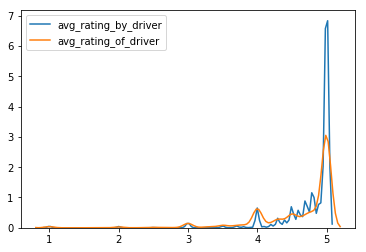

In [14]:
# histogram for the 2 rating columns

_ = sns.kdeplot(udc.avg_rating_by_driver)
_ = sns.kdeplot(udc.avg_rating_of_driver)

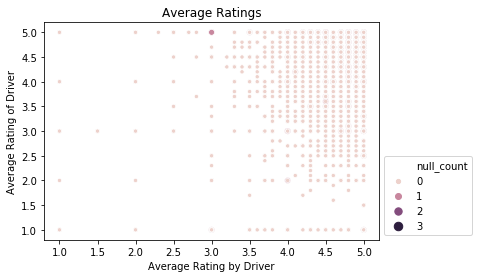

In [15]:
# scatter plot for the 2 rating columns vs each other

_ = sns.scatterplot(x='avg_rating_by_driver', 
                    y='avg_rating_of_driver', 
                    data = udc, 
                    hue='null_count', 
                    size='null_count')
_ = plt.title('Average Ratings')
_ = plt.xlabel('Average Rating by Driver')
_ = plt.ylabel('Average Rating of Driver')
_ = plt.legend(loc='lower left', bbox_to_anchor=(1,0))

### Address Null Values

Less than 1/2% of the rows have 2 or more null values, those rows can be disregarded without losing a large portion of the data.

In [16]:
# remove rows from udc where more than 1 null value is present

# create a list of indexes that have more than 1 null value
rm_rows = udc_null.index[udc_null['null_count'] > 1].tolist()

# use that list to drop the rows from the udc df
udc = udc.drop(rm_rows)
udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,null_count
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


# PART 2 ‑ Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.


However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

2a. how you will implement the experiment

2b. what statistical test(s) you will conduct to verify the significance of the observation

2c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Active Users

In [17]:
# create active column

print('Newest Date:', max(list(udc['last_trip_date'])))
print('Oldest Date:', min(list(udc['last_trip_date'])))

# if last_trip_date was within 30 days of the newest date
udc['active'] = np.where(udc['last_trip_date'] >= '2014-06-01', True, False)
udc.head()

Newest Date: 2014-07-01
Oldest Date: 2014-01-01


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,null_count,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,False


## Correlation Matrix

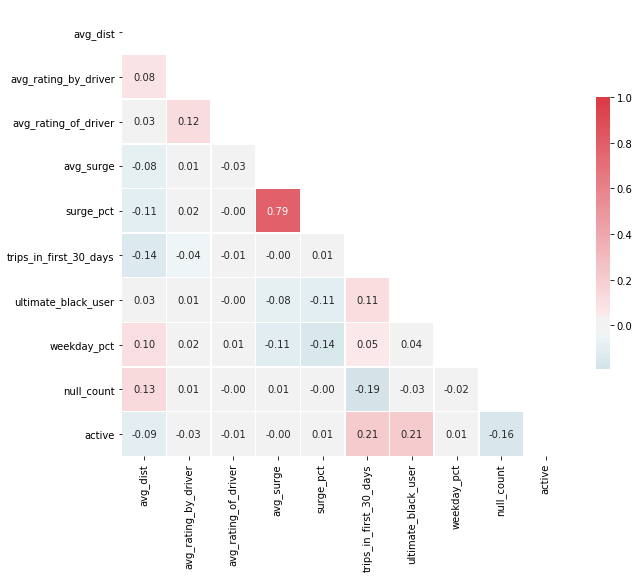

In [18]:
# Compute the correlation matrix
corr = udc.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

The only correlative values are 'surge_prct' and 'avg_surg' with a value of 0.79
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips

# PART 3 ‑ Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file Ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).